# Lab 13
Jennifer Lin
jenniferyjlin@berkeley.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.mixture import GaussianMixture
import math  
import statistics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving lab_13_data_01.xlsx to lab_13_data_01.xlsx
Saving lab_13_data_02.xlsx to lab_13_data_02.xlsx


# 1
Perform PCA on the iris dataset found in lab 13 data 01.xlsx, with all the features excluding Species.

In [3]:
df = pd.read_excel('lab_13_data_01.xlsx')
df.head()

,Sepal.Length,Sepal.Width,Pedal.Length,Pedal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
species = df["Species"]

In [5]:
del df['Species']
df.head()

,Sepal.Length,Sepal.Width,Pedal.Length,Pedal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
df_t = StandardScaler().fit_transform(df)

In [0]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_t)

In [0]:
pca_df = pd.DataFrame(data = pca_data, columns = ['PC_1','PC_2'])

# 2
Visualize the data on a scatter plot with dimensions as the principal components and color each data point according to its specie. What can you conclude about the efficacy of PCA on this dataset? hint: think of explained variance of each principal component.

In [0]:
 species_colors = []
 for s in species:
    if s == "Iris-setosa":
        species_colors.append("green")
    elif s == "Iris-versicolor":
        species_colors.append("red")
    elif s== "Iris-virginica":
        species_colors.append("blue")

Text(0, 0.5, 'PC_2')

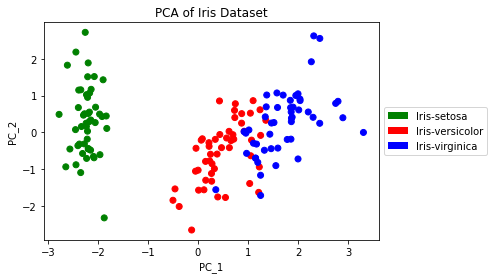

In [10]:
plt.scatter(pca_df['PC_1'],pca_df['PC_2'],c=species_colors)
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']
class_colours = ['green','red','blue']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('PCA of Iris Dataset')
plt.xlabel('PC_1')
plt.ylabel('PC_2')

In [11]:
print("The variance that PC_1 explains is",round(pca.explained_variance_[0],2))
print("The variance that PC_2 explains is",round(pca.explained_variance_[1],2))

The variance that PC_1 explains is 2.93
The variance that PC_2 explains is 0.93


In [12]:
print("The ratio of variance that PC_1 explains is",round(pca.explained_variance_ratio_[0],2))
print("The ratio of variance that PC_2 explains is",round(pca.explained_variance_ratio_[1],2))

The ratio of variance that PC_1 explains is 0.73
The ratio of variance that PC_2 explains is 0.23


> PC_1 explains 73% of the total variance. PC_2 explains 23% of the total variance. Thus, this analysis explains 96% variance of the original dataset, which is very high and can almost represent the original dataset. Consequently, the efficacy of PCA on this dataset is very high.

# 3
Load the dataset lab 13 data 02.xlsx and use a Gaussian mixture model from the sklearn package to estimate the means of the dataset. You may want to visualize the dataset first to see how many components it has.

In [13]:
df2 = pd.read_excel('lab_13_data_02.xlsx')
data = df2['data']
data.head()

0    2.021531
1    2.128651
2    1.959028
3    1.923906
4    1.898964
Name: data, dtype: float64

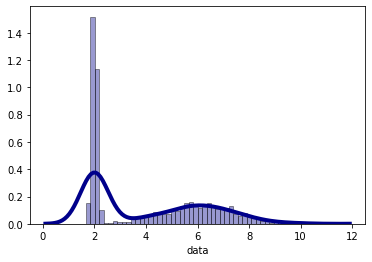

In [14]:
# Density Plot and Histogram of df2('lab_13_data_02.xlsx')
sns.distplot(data, hist=True, kde=True, 
             bins=50,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

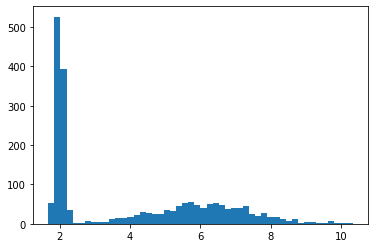

In [16]:
counts, edges, plot = plt.hist(data, bins=50)
bins = []
for i in range(len(edges)-1):
  bins = bins + [(edges[i]+edges[i+1])/2]

In [17]:
# print(bins)
# print(counts)
hist_data = pd.DataFrame({"bins":bins,"counts":counts})
hist_data.head()

,bins,counts
0,1.757021,54.0
1,1.930342,526.0
2,2.103663,392.0
3,2.276984,35.0
4,2.450305,2.0


In [18]:
GM = GaussianMixture(n_components=2).fit(hist_data)
# print(GM.means_)
print("The mean for component_1 is", round(GM.means_[0,0],2))
print("The mean for component_2 is", round(GM.means_[1,0],2))

The mean for component_1 is 6.17
The mean for component_2 is 2.02


# 4
What does the .weights_ attribute of a GaussianMixture object mean?

> The .weights_ attribute of a GaussianMixture object represents the weights of each mixture components.

In [19]:
# print(GM.weights_)
print("The weight for component_1 (mean = ", round(GM.means_[0,0],2),") is ",round(GM.weights_[0],2), sep='')
print("The weight for component_2 (mean = ", round(GM.means_[1,0],2),") is ",round(GM.weights_[1],2), sep='')

The weight for component_1 (mean = 6.17) is 0.96
The weight for component_2 (mean = 2.02) is 0.04


# 5
Rotate the PCA matrix by 30 degrees counterclockwise. You need to specify a rotation matrix (provided below) and perform matrix multiplication. Explain quantitatively if your transformed PCA matrix still has principal components.

In [20]:
rotate = np.array([[math.cos(math.pi/6), -math.sin(math.pi/6)],
                   [math.sin(math.pi/6), math.cos(math.pi/6)]])
print(rotate)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


In [21]:
pc_matrix = np.array([pca_df["PC_1"],pca_df["PC_2"]])
pc_rotated_matrix = rotate.dot(pc_matrix)
pc_rotated_df = pd.DataFrame(data={"PC_1_rotated":pc_rotated_matrix[0],"PC_2_rotated":pc_rotated_matrix[1]})
pc_rotated_df.head()

,PC_1_rotated,PC_2_rotated
0,-2.214003,-0.694318
1,-1.479195,-1.610810
2,-1.891467,-1.459785
3,-1.707809,-1.650382
4,-2.406126,-0.610023


Text(0, 0.5, 'PC_2_rotated')

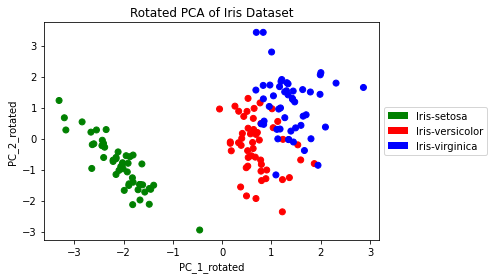

In [22]:
plt.scatter(pc_rotated_df['PC_1_rotated'],pc_rotated_df['PC_2_rotated'],c=species_colors)
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']
class_colours = ['green','red','blue']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Rotated PCA of Iris Dataset')
plt.xlabel('PC_1_rotated')
plt.ylabel('PC_2_rotated')

In [23]:
pc_1_var = round(statistics.variance(pca_df['PC_1']),2)
pc_2_var = round(statistics.variance(pca_df['PC_2']),2)
pc_1_r_var = round(statistics.variance(pc_rotated_df['PC_1_rotated']),2)
pc_2_r_var = round(statistics.variance(pc_rotated_df['PC_2_rotated']),2)
print("The variance explained by original PC_1 is ", pc_1_var,
      ". The variane explained by rotated PC_1 is ", pc_1_r_var,
      ". Thus, the PC_1_rotated explains ", round(pc_1_r_var/pc_1_var,2)*100, "% of original PC_1.", 
      sep="")
print("The variance explained by original PC_2 is ", pc_2_var,
      ". The variane explained by rotated PC_2 is ", pc_2_r_var,
      ". Thus, the PC_2_rotated explains ", round(pc_2_r_var/pc_2_var,2)*100, "% of original PC_2.", 
      sep="")

The variance explained by original PC_1 is 2.93. The variane explained by rotated PC_1 is 2.43. Thus, the PC_1_rotated explains 83.0% of original PC_1.
The variance explained by original PC_2 is 0.93. The variane explained by rotated PC_2 is 1.43. Thus, the PC_2_rotated explains 154.0% of original PC_2.


> As mentioned in last code chunk, PC_1_rotated can represent 83% of orginal PC_1 and PC_2_rotated can represent 154% of orginal PC_2. This is because the data points are rotated. Some of the variance explained in original PC_1 is now explained by PC_2_rotated.
>
> To sum up, transformed PCA matrix still have some principal components but the variances that the PCs explain are changed because of rotating.

# 6
How do eigenvectors come into play when doing rotations and projections? And how about when performing PCA?

> Rotations and projections can be thought of as a type of scaling. Basically all the rotations and projections of a vector can be broken down into scaling its components in a particular basis. When an operation scales a vector by a factor, that vector is called an eigenvector of the operation.
>
> Principal components in PCA are eigenvectors. The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. The length of these vectors corresponds to the amount of total variance in the dataset that lies along its direcition, which are eigenvalues.

# 7
Name an algorithm frequently used in computational biology that is a special case of the EM algorithm or that uses the EM technique.

> Multiple EM for Motif Elicitation (MEME)
>> A sequence motif is a sequence pattern of biological significance. For example, it can be some DNA sequences corresponding to protein binding sites or it can be some protein sequences corresponding to common functions or conserved pieces of structure.
>>
>> Given a set of sequences that are thought to contain occurrences of an unknown motif of interest, we can predict the locations of the motif occurrences in the given sequences using EM.
>>
>> In MEME, first, we need to define the probabilistic model and likelihood function. Second, we identify the hidden variables (Z), which are the locations of the motifs. Third, we conduct the Expectation (E) step, where we compute the expected values of the hidden variables given current parameter values. Forth, we conduct the Maximization (M) step, where we determine the parameters that maximize the likelihood function, given the expected values of the hidden variables. We repeat the steps and at the end we can obtain a plausible motif in the given sequences.

# 8
How is EM different than K-means clustering? hint: think about probabilities

> K-means
>> The K-means algorithm calculates the Euclidean distance while calculating the distance between each of two data items and cluster the data points with data points that have shorter distance to each other.

> EM
>> EM uses statistical methods while clustering. Its clustering algorithm relies on maximizing the likelihood to find the statistical parameters of the underlying sub-populations in the dataset.
>>
>> The EM algorithm alternates between two steps (E-step and M-step). In the E-step the algorithm tries to find a lower bound function on the original likelihood using the current estimate of the statistical parameters. In the M-step the algorithm finds new estimates of those statistical parameters by maximizing the lower bound function (i.e. determine the MLE of the statistical parameters). Since at each step we maximize the lower bound function, the algorithm always produces estimates with higher likelihood than the previous iteration and ultimately converge to a maxima.
>>
>> The advantage of using EM is that the clusters are not limited to spherical shapes. In EM we can constrain the algorithm to provide different covariance matrices (spherical, diagonal and generic). These different covariance matrices in return allow us to control the shape of our clusters and hence we can detect sub-populations in our data with different characteristics.